In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-dataset-19212020-160k-tracks/super_genres.json
/kaggle/input/spotify-dataset-19212020-160k-tracks/data_w_genres.csv
/kaggle/input/spotify-dataset-19212020-160k-tracks/data_by_genres.csv
/kaggle/input/spotify-dataset-19212020-160k-tracks/data_by_year.csv
/kaggle/input/spotify-dataset-19212020-160k-tracks/data.csv
/kaggle/input/spotify-dataset-19212020-160k-tracks/data_by_artist.csv


In [2]:
data = pd.read_csv('/kaggle/input/spotify-dataset-19212020-160k-tracks/data.csv',index_col=0)

In [3]:
data.head()

,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
acousticness,,,,,,,,,,,,,,,,,,
0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [4]:
data.columns

Index(['artists', 'danceability', 'duration_ms', 'energy', 'explicit', 'id',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name',
       'popularity', 'release_date', 'speechiness', 'tempo', 'valence',
       'year'],
      dtype='object')

In [5]:
data.shape

(169909, 18)

In [6]:
data.info

<bound method DataFrame.info of                                                artists  danceability  \
acousticness                                                           
0.9950                             ['Carl Woitschach']         0.708   
0.9940        ['Robert Schumann', 'Vladimir Horowitz']         0.379   
0.6040                         ['Seweryn Goszczyński']         0.749   
0.9950                            ['Francisco Canaro']         0.781   
0.9900        ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   
...                                                ...           ...   
0.1730                          ['DripReport', 'Tyga']         0.875   
0.0167              ['Leon Bridges', 'Terrace Martin']         0.719   
0.5380                           ['Kygo', 'Oh Wonder']         0.514   
0.0714                   ['Cash Cash', 'Andy Grammer']         0.646   
0.1090                              ['Ingrid Andress']         0.512   

              duration_ms  ener

In [7]:
data.sort_values(by='release_date',ascending=False)

,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
acousticness,,,,,,,,,,,,,,,,,,
0.1930,['Swae Lee'],0.539,232000,0.4160,1,2p72O2JobPc9sVz520Hil5,0.000000,9,0.188,-11.142,1,Reality Check,0,2020-06-18,0.0580,119.980,0.0804,2020
0.6860,['G-Eazy'],0.606,177657,0.4630,0,2r6agJaA9OsWpQk6cIsy17,0.088600,7,0.481,-10.854,0,Everybody's Gotta Learn Sometime,0,2020-06-17,0.0377,129.970,0.0816,2020
0.7280,['G-Eazy'],0.558,177657,0.4600,1,345aCD2ReEBsMqKE392DKM,0.078700,7,0.295,-10.919,0,Everybody's Gotta Learn Sometime,0,2020-06-17,0.0471,129.608,0.1020,2020
0.0328,"['6ix9ine', 'Nicki Minaj']",0.722,185667,0.5020,1,2rd4EiTUttYeshOynDXM3Z,0.000038,1,0.108,-8.108,1,TROLLZ - Alternate Edition (with Nicki Minaj),0,2020-06-16,0.2060,179.989,0.3500,2020
0.0137,['Lady Gaga'],0.573,261083,0.8650,0,4IJOll4wTwDrv0HxGLvWjb,0.000000,11,0.361,-5.080,1,Born This Way,0,2020-06-16,0.2860,123.853,0.4160,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.9670,['Frank Parker'],0.275,210000,0.3090,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,2,1921,0.0354,100.109,0.1650,1921
0.9780,['Georgius'],0.502,158173,0.4030,0,3ZlvfjWLxFqfOGK2FTR2ph,0.000000,7,0.255,-16.814,1,Un Agent Courait,0,1921,0.4660,67.883,0.7160,1921
0.9870,"['Ludwig van Beethoven', 'Arturo Toscanini']",0.544,269547,0.2590,0,3YWrfsNGrZNsC270jMiBad,0.053200,0,0.139,-17.458,1,IV. Finale. Adagio - Allegro molto e vivace,0,1921,0.0437,78.290,0.4330,1921


In [8]:
print("MAXIMUM DURATION SONG - " , np.max(data.duration_ms)/(1000*60), "minutes")
print("MINIMUM DURATION SONG - " , np.min(data.duration_ms)/(1000*60) , "minutes")
print("Average song duration : ", np.mean(data.duration_ms)/(1000*60) , "minutes")

MAXIMUM DURATION SONG -  90.05833333333334 minutes
MINIMUM DURATION SONG -  0.08513333333333334 minutes
Average song duration :  3.856769316222213 minutes


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e34079b50>]],
      dtype=object)

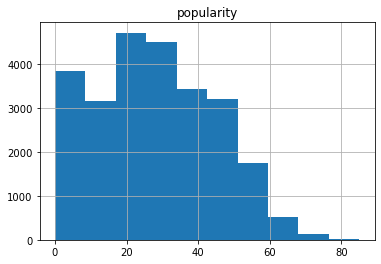

In [9]:
data.groupby('loudness').agg({'popularity':'mean'}).sort_values(by='popularity',ascending=False).hist()

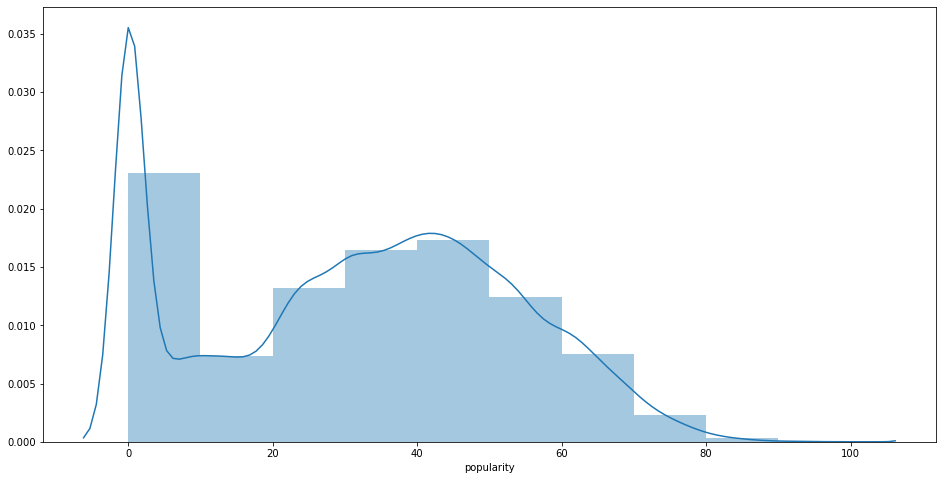

In [10]:
plt.figure(figsize=(16, 8))
sns.distplot(data.popularity,bins=10)

In [11]:
gr_yr = data.groupby('year').agg({'duration_ms' : 'mean'})
print(gr_yr.tail(20))

        duration_ms
year               
2001  241011.540000
2002  239810.235500
2003  245057.708000
2004  239908.288500
2005  238882.838000
2006  236364.348500
2007  242951.749500
2008  239900.875000
2009  238880.798000
2010  243543.909500
2011  236586.656000
2012  242556.937500
2013  239570.822500
2014  231953.446000
2015  224708.844122
2016  219400.763840
2017  209343.613000
2018  200919.119000
2019  197733.133000
2020  197114.662301


In [12]:
plt.figure(figsize=(14,5))
sns.barplot(x = gr_yr.index[-10:] , y=gr_yr.duration_ms[-10:] , data = gr_dur)

NameError: name 'gr_dur' is not defined

<Figure size 1008x360 with 0 Axes>

In [13]:
gr_yr = data.groupby('year').agg({'popularity' : 'sum'})
print(gr_yr)

      popularity
year            
1921          45
1922          10
1923         968
1924         143
1925         712
...          ...
2016      120840
2017      129723
2018      134552
2019      139311
2020      110823

[100 rows x 1 columns]


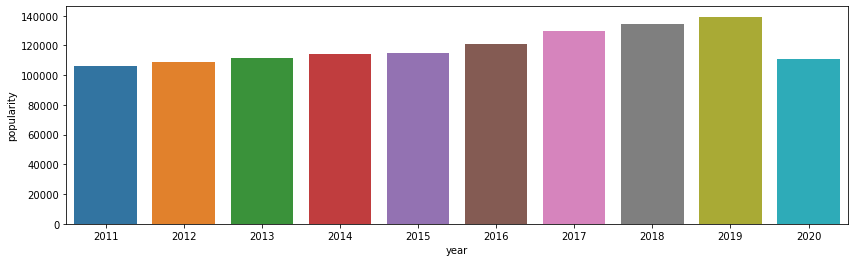

In [14]:
plt.figure(figsize=(14,4))
sns.barplot(x = gr_yr.index[-10:] , y=gr_yr.popularity[-10:] , data = gr_yr)

In [15]:
print('50 Most Popular Songs on Spotify!')
data[['name','artists','release_date','popularity']].sort_values(by='popularity',ascending=False).head(50)

50 Most Popular Songs on Spotify!


,name,artists,release_date,popularity
acousticness,,,,
0.00146,Blinding Lights,['The Weeknd'],2020-03-20,100
0.24700,ROCKSTAR (feat. Roddy Ricch),"['DaBaby', 'Roddy Ricch']",2020-04-17,99
0.73100,death bed (coffee for your head) (feat. beabad...,"['Powfu', 'beabadoobee']",2020-02-08,97
0.23300,THE SCOTTS,"['THE SCOTTS', 'Travis Scott', 'Kid Cudi']",2020-04-24,96
0.06860,ily (i love you baby) (feat. Emilee),"['Surf Mesa', 'Emilee']",2019-11-26,95
0.32100,Toosie Slide,['Drake'],2020-04-03,95
0.10400,The Box,['Roddy Ricch'],2019-12-06,95
0.30500,Supalonely,"['BENEE', 'Gus Dapperton']",2019-11-15,95
0.74900,Party Girl,['StaySolidRocky'],2020-04-21,94


In [16]:
data[data["popularity"] > 90]["name"]


acousticness
0.61200                                            Play Date
0.08470                                           goosebumps
0.12300                                              Falling
0.00513                                           SICKO MODE
0.10400                                              The Box
0.18300                                          Sunday Best
0.05220                                              ROXANNE
0.30500                                           Supalonely
0.25600                                               Say So
0.05460                                  HIGHEST IN THE ROOM
0.01250                                      Don't Start Now
0.06860                 ily (i love you baby) (feat. Emilee)
0.75100                                    Someone You Loved
0.69200                                         Dance Monkey
0.32800                                              bad guy
0.83700                                             Memories
0.22300    

In [17]:
most_pop_artists = data.groupby('artists').count().sort_values(by='popularity',ascending=False)

In [18]:
print('20 most Popular Artists on Spotify : \n')
for i in most_pop_artists.head(20).index:
    print(i,end='\n')
    


20 most Popular Artists on Spotify : 

['Эрнест Хемингуэй']
['Francisco Canaro']
['Эрих Мария Ремарк']
['Ignacio Corsini']
['Frank Sinatra']
['Bob Dylan']
['The Rolling Stones']
['Johnny Cash']
['The Beach Boys']
['Elvis Presley']
['Francisco Canaro', 'Charlo']
['Queen']
['Dean Martin']
['The Beatles']
['Miles Davis']
['Billie Holiday']
['Fleetwood Mac']
['Ella Fitzgerald']
['Lead Belly']
['Led Zeppelin']


In [19]:
data.corr()

,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
danceability,1.000000,-0.134500,0.220569,0.241891,-0.281429,0.022599,-0.105532,0.294170,-0.045306,0.221077,0.225305,-0.004872,0.560242,0.203430
duration_ms,-0.134500,1.000000,0.036396,-0.043811,0.084814,-0.003116,0.034270,-0.014687,-0.046981,0.063292,-0.058449,-0.028816,-0.198760,0.076293
energy,0.220569,0.036396,1.000000,0.142677,-0.287692,0.029984,0.126293,0.782982,-0.038355,0.497488,-0.045226,0.249936,0.350086,0.532419
explicit,0.241891,-0.043811,0.142677,1.000000,-0.138292,0.008578,0.039272,0.152695,-0.083221,0.214044,0.413074,0.011484,-0.022327,0.245227
instrumentalness,-0.281429,0.084814,-0.287692,-0.138292,1.000000,-0.014268,-0.047397,-0.417033,-0.035051,-0.299829,-0.115735,-0.107570,-0.193929,-0.291571
key,0.022599,-0.003116,0.029984,0.008578,-0.014268,1.000000,-0.000106,0.021920,-0.112766,0.010675,0.015225,0.003148,0.029064,0.012503
liveness,-0.105532,0.034270,0.126293,0.039272,-0.047397,-0.000106,1.000000,0.052985,0.005393,-0.075293,0.147667,0.008124,-0.000426,-0.055839
loudness,0.294170,-0.014687,0.782982,0.152695,-0.417033,0.021920,0.052985,1.000000,-0.013147,0.466546,-0.105796,0.211114,0.308418,0.490118
mode,-0.045306,-0.046981,-0.038355,-0.083221,-0.035051,-0.112766,0.005393,-0.013147,1.000000,-0.032854,-0.057493,0.014539,0.014727,-0.033084
popularity,0.221077,0.063292,0.497488,0.214044,-0.299829,0.010675,-0.075293,0.466546,-0.032854,1.000000,-0.135707,0.135047,0.009327,0.880724


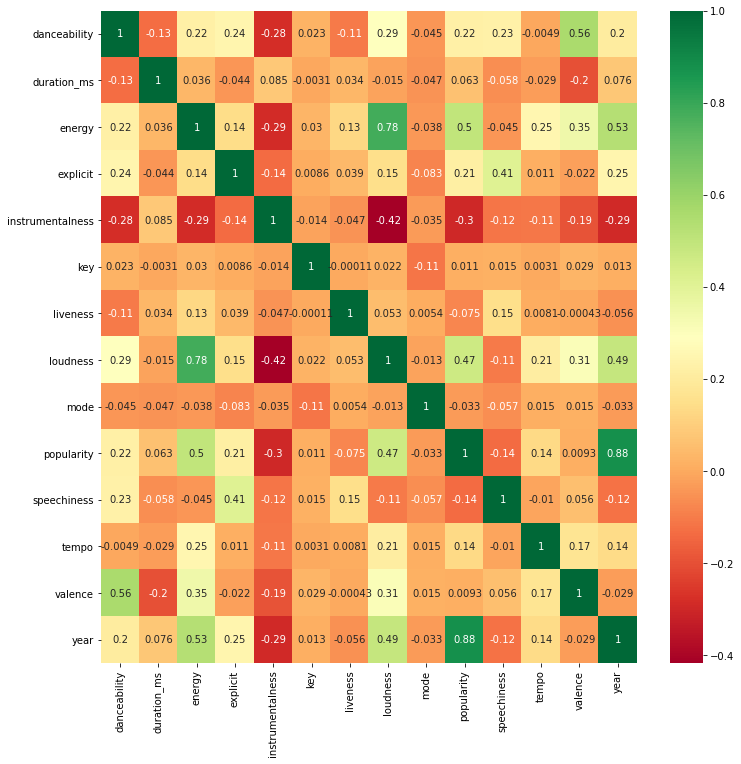

In [20]:
corrmat = data.corr()
top_corr_feat = corrmat.index
plt.figure(figsize=(12,12))
h = sns.heatmap(data[top_corr_feat].corr(),annot=True,cmap="RdYlGn")


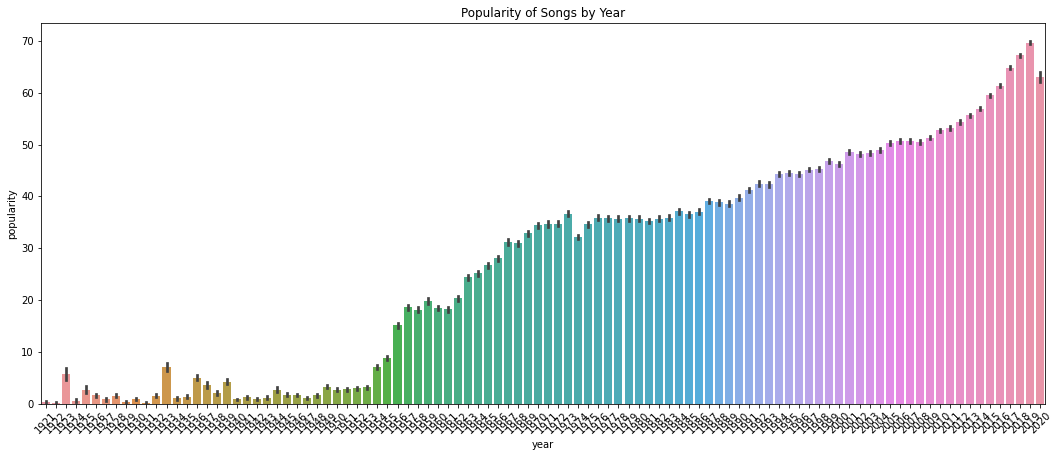

In [21]:
plt.figure(figsize=(18,7))
plt.xlabel('year')
plt.ylabel('popularity')
plt.xticks(rotation=45)
plt.title('Popularity of Songs by Year')
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
sns.barplot(x='year',y='popularity',data=data.sort_values(by='year',ascending=False))
plt.show()

Text(0, 0.5, 'song count')

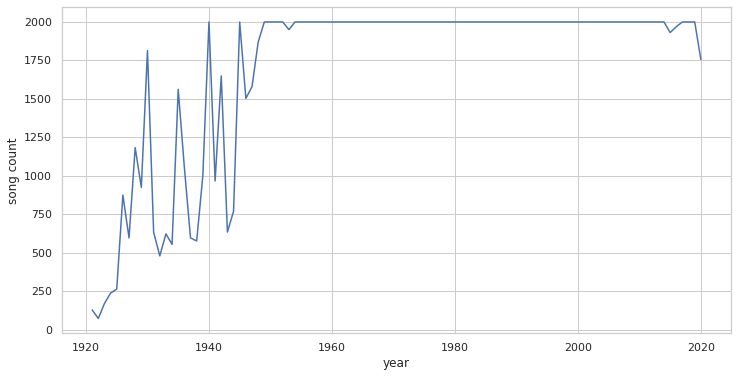

In [22]:
plt.figure(figsize = (12,6))
sns.set(style='whitegrid')
x = data.groupby('year')['id'].count()
ax = sns.lineplot(x.index , x)
ax.set_xlabel('year')
ax.set_ylabel('song count')


Text(0, 0.5, 'danceability of songs')

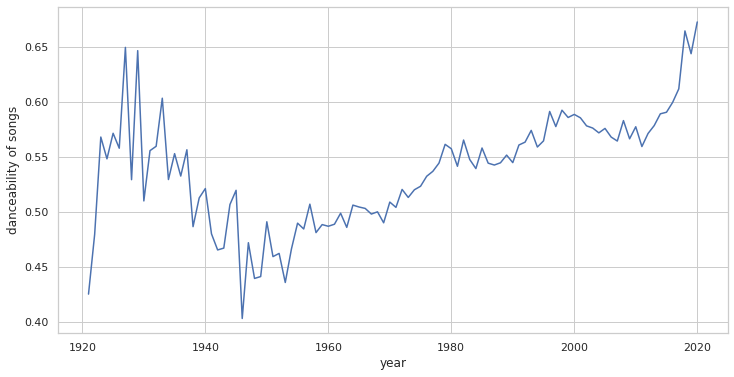

In [23]:
plt.figure(figsize = (12,6))
sns.set(style='whitegrid')
x = data.groupby('year')['danceability'].mean()
ax = sns.lineplot(x.index , x)
ax.set_xlabel('year')
ax.set_ylabel('danceability of songs')

Text(0, 0.5, 'explicit songs count')

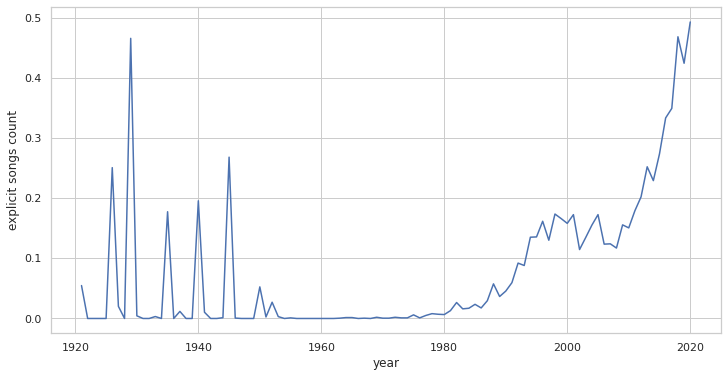

In [24]:
plt.figure(figsize = (12,6))
x = data.groupby('year')['explicit'].mean().sort_values(ascending=False)
ax = sns.lineplot(x.index , x)
ax.set_xlabel('year')
ax.set_ylabel('explicit songs count')

Text(0, 0.5, 'loudness')

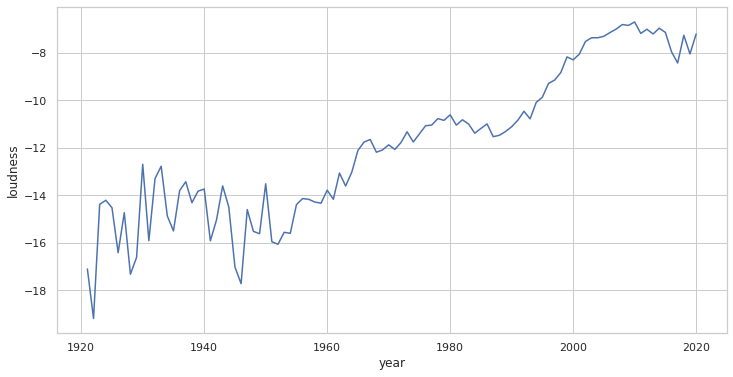

In [25]:
plt.figure(figsize = (12,6))
x = data.groupby('year')['loudness'].mean().sort_values(ascending=False)
ax = sns.lineplot(x.index , x)
ax.set_xlabel('year')
ax.set_ylabel('loudness')

Text(0, 0.5, 'tempo')

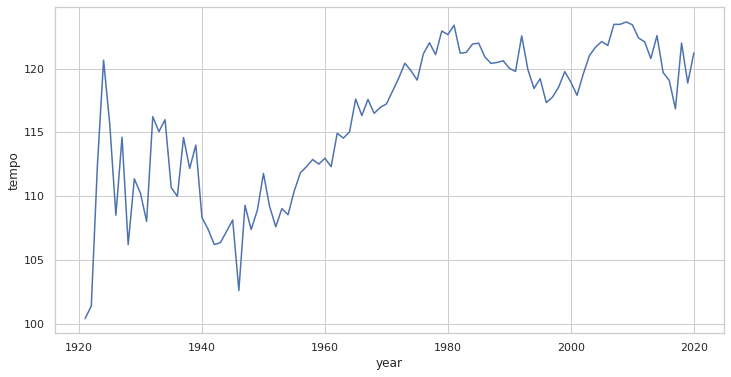

In [26]:
plt.figure(figsize = (12,6))
x = data.groupby('year')['tempo'].mean()
ax = sns.lineplot(x.index , x)
ax.set_xlabel('year')
ax.set_ylabel('tempo')

Text(0, 0.5, 'energy')

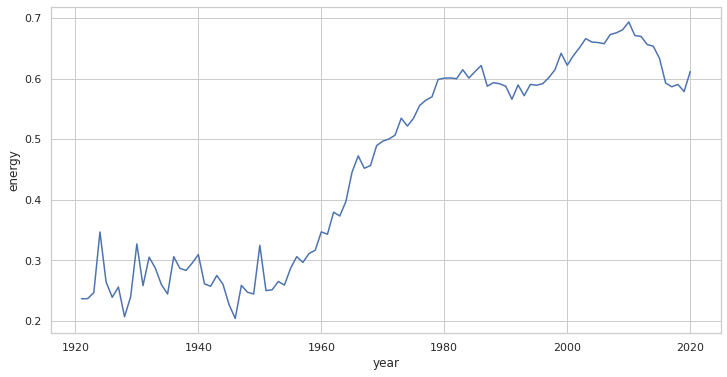

In [27]:
plt.figure(figsize = (12,6))
x = data.groupby('year')['energy'].mean()
ax = sns.lineplot(x.index , x)
ax.set_xlabel('year')
ax.set_ylabel('energy')

Text(0, 0.5, 'instrumentalness')

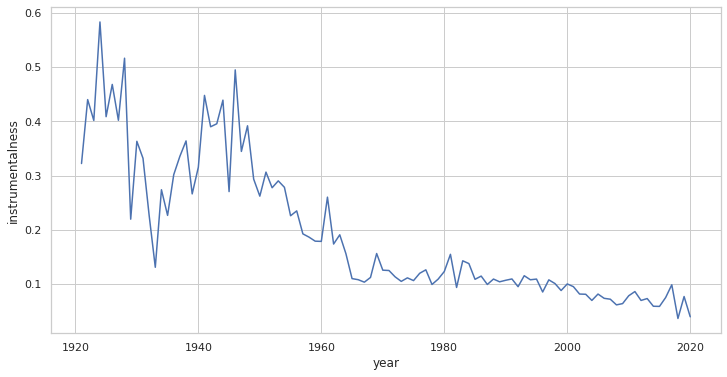

In [28]:
plt.figure(figsize = (12,6))
x = data.groupby('year')['instrumentalness'].mean()
ax = sns.lineplot(x.index , x)
ax.set_xlabel('year')
ax.set_ylabel('instrumentalness')

Text(0, 0.5, 'speechiness')

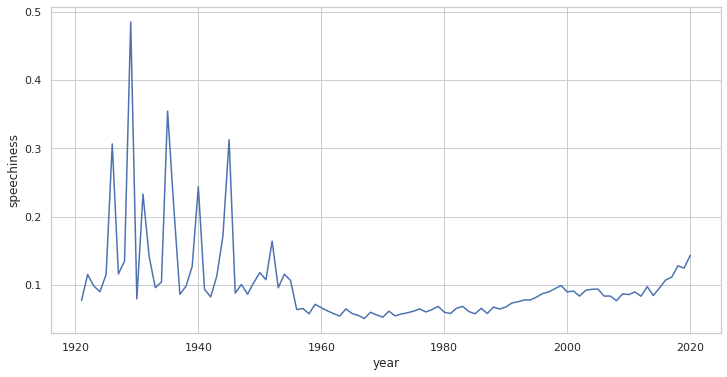

In [29]:
plt.figure(figsize = (12,6))
x = data.groupby('year')['speechiness'].mean()
ax = sns.lineplot(x.index , x)
ax.set_xlabel('year')
ax.set_ylabel('speechiness')